![image.png](attachment:image.png)

# D. Data Pre-processing

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

C:\Users\Ghodke Pradator\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


D.1 General information about data, data inspection

In [ ]:
df= pd.read_csv('Walmart DataSet.csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Following Columns has wrong datatype

- Date

In [ ]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

D.2 Checking & Handling missing values as well as Duplicates if any.

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

D.3 Data distribution using boxplot

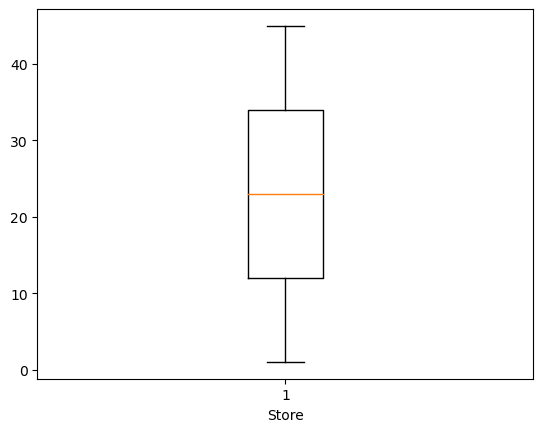

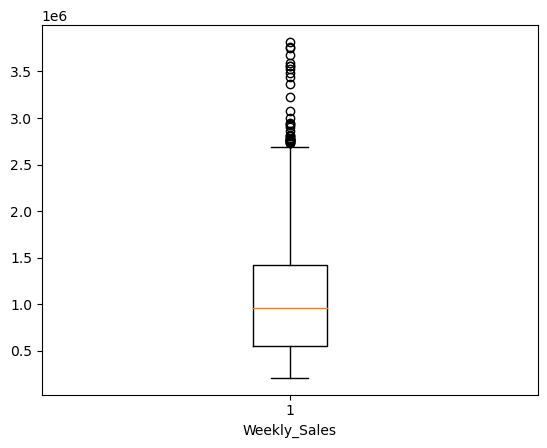

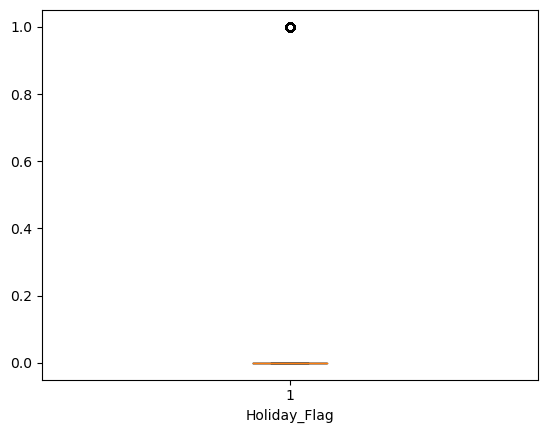

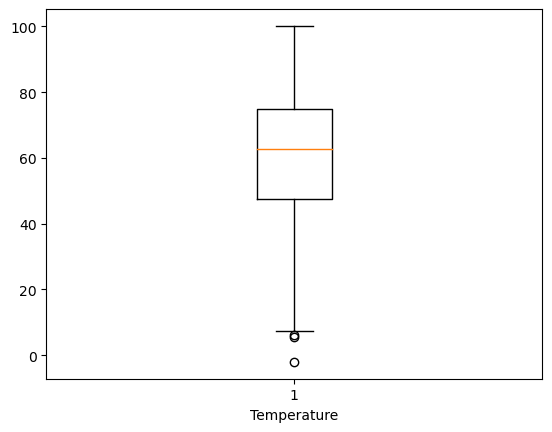

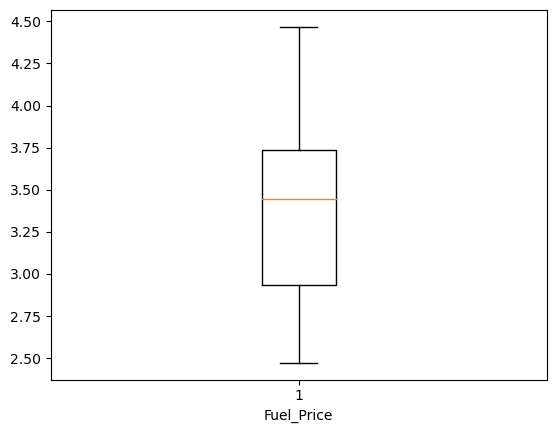

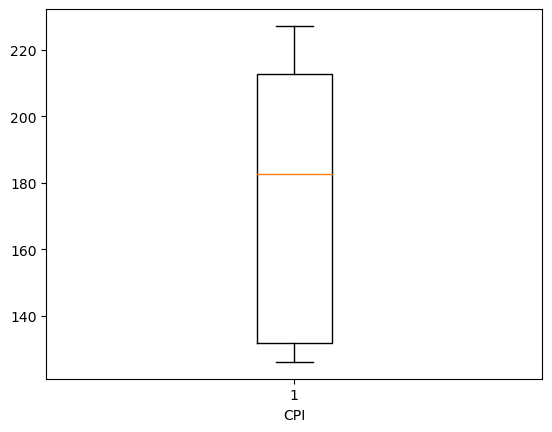

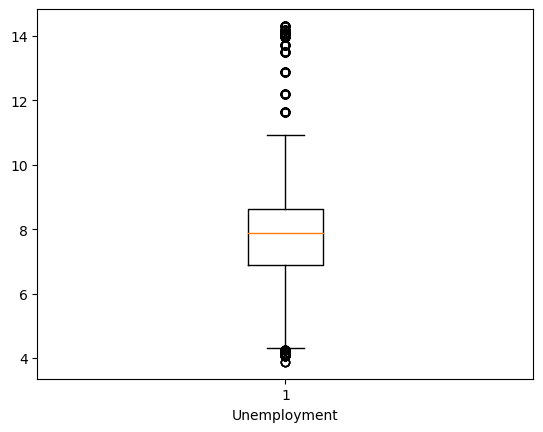

In [ ]:
for i in df.columns:
    if (df[i].dtype!= 'object') and (i!= 'Date'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

- Weekly_Sales & Unemployment has some outliers but we won't remove them as dates are unique and they may hold important data.

D.4 Feature Engineering

In [ ]:
df.insert(2,'Day',df['Date'].dt.day_name())
df

Store       Date     Day  Weekly_Sales  Holiday_Flag  Temperature  \
0         1 2010-02-05  Friday    1643690.90             0        42.31   
1         1 2010-02-12  Friday    1641957.44             1        38.51   
2         1 2010-02-19  Friday    1611968.17             0        39.93   
3         1 2010-02-26  Friday    1409727.59             0        46.63   
4         1 2010-03-05  Friday    1554806.68             0        46.50   
...     ...        ...     ...           ...           ...          ...   
6430     45 2012-09-28  Friday     713173.95             0        64.88   
6431     45 2012-10-05  Friday     733455.07             0        64.89   
6432     45 2012-10-12  Friday     734464.36             0        54.47   
6433     45 2012-10-19  Friday     718125.53             0        56.47   
6434     45 2012-10-26  Friday     760281.43             0        58.85   

      Fuel_Price         CPI  Unemployment  
0          2.572  211.096358         8.106  
1          2.548  211.242170         8.106  
2          2.514  211.289143         8.106  
3          2.561  211.319643         8.106  
4          2.625  211.350143         8.106  
...          ...         ...           ...  
6430       3.997  192.013558         8.684  
6431       3.985  192.170412         8.667  
6432       4.000  192.327265         8.667  
6433       3.969  192.330854         8.667  
6434       3.882  192.308899         8.667  

[6435 rows x 9 columns]

In [ ]:
df['Day'].value_counts()

Day
Friday    6435
Name: count, dtype: int64

All the data is collected at end of Friday

In [ ]:
df.drop('Day',axis=1,inplace=True)

In [ ]:
df.insert(2,'Month',df['Date'].dt.month_name())
df

Store       Date      Month  Weekly_Sales  Holiday_Flag  Temperature  \
0         1 2010-02-05   February    1643690.90             0        42.31   
1         1 2010-02-12   February    1641957.44             1        38.51   
2         1 2010-02-19   February    1611968.17             0        39.93   
3         1 2010-02-26   February    1409727.59             0        46.63   
4         1 2010-03-05      March    1554806.68             0        46.50   
...     ...        ...        ...           ...           ...          ...   
6430     45 2012-09-28  September     713173.95             0        64.88   
6431     45 2012-10-05    October     733455.07             0        64.89   
6432     45 2012-10-12    October     734464.36             0        54.47   
6433     45 2012-10-19    October     718125.53             0        56.47   
6434     45 2012-10-26    October     760281.43             0        58.85   

      Fuel_Price         CPI  Unemployment  
0          2.572  211.096358         8.106  
1          2.548  211.242170         8.106  
2          2.514  211.289143         8.106  
3          2.561  211.319643         8.106  
4          2.625  211.350143         8.106  
...          ...         ...           ...  
6430       3.997  192.013558         8.684  
6431       3.985  192.170412         8.667  
6432       4.000  192.327265         8.667  
6433       3.969  192.330854         8.667  
6434       3.882  192.308899         8.667  

[6435 rows x 9 columns]

In [ ]:
df.insert(3,'Quarter',df['Date'].dt.quarter)
df

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature  Fuel_Price         CPI  Unemployment  
0           42.31       2.572  211.096358         8.106  
1           38.51       2.548  211.242170         8.106  
2           39.93       2.514  211.289143         8.106  
3           46.63       2.561  211.319643         8.106  
4           46.50       2.625  211.350143         8.106  
...           ...         ...         ...           ...  
6430        64.88       3.997  192.013558         8.684  
6431        64.89       3.985  192.170412         8.667  
6432        54.47       4.000  192.327265         8.667  
6433        56.47       3.969  192.330854         8.667  
6434        58.85       3.882  192.308899         8.667  

[6435 rows x 10 columns]

In [ ]:
df.insert(7,'Weather',pd.cut(df['Temperature'], bins=[-np.inf, 30, 60, 90, np.inf], labels=['Cold', 'Mild', 'Warm', 'Hot']))
df

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

In [ ]:
df['Weather']=df['Weather'].astype(str)

- ### **We have added Following features to understand the sales better**

   - Month- To understand monthly seasonality in data.
   - Quarter - To understand quartery performances of stores.
   - Weather - To make understanding easy for effect of weather on sales.

# E. Exploratory Data Analysis (EDA)

In [ ]:
df

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

Count of store numbers

In [ ]:
df['Store'].nunique()

45

In [ ]:
df['Store'].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

- There are 45 stores and each store contribute equally to data

Holiday Season

In [ ]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

- There are 450 weeks of holiday season

### Descriptive Statistics

In [ ]:
stat=df.drop(['Store','Month','Holiday_Flag','Weather'],axis=1)
stat

Date  Quarter  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0    2010-02-05        1    1643690.90        42.31       2.572  211.096358   
1    2010-02-12        1    1641957.44        38.51       2.548  211.242170   
2    2010-02-19        1    1611968.17        39.93       2.514  211.289143   
3    2010-02-26        1    1409727.59        46.63       2.561  211.319643   
4    2010-03-05        1    1554806.68        46.50       2.625  211.350143   
...         ...      ...           ...          ...         ...         ...   
6430 2012-09-28        3     713173.95        64.88       3.997  192.013558   
6431 2012-10-05        4     733455.07        64.89       3.985  192.170412   
6432 2012-10-12        4     734464.36        54.47       4.000  192.327265   
6433 2012-10-19        4     718125.53        56.47       3.969  192.330854   
6434 2012-10-26        4     760281.43        58.85       3.882  192.308899   

      Unemployment  
0            8.106  
1            8.106  
2            8.106  
3            8.106  
4            8.106  
...            ...  
6430         8.684  
6431         8.667  
6432         8.667  
6433         8.667  
6434         8.667  

[6435 rows x 7 columns]

In [ ]:
stat.describe()

Date      Quarter  Weekly_Sales  Temperature  \
count                 6435  6435.000000  6.435000e+03  6435.000000   
mean   2011-06-17 00:00:00     2.482517  1.046965e+06    60.663782   
min    2010-02-05 00:00:00     1.000000  2.099862e+05    -2.060000   
25%    2010-10-08 00:00:00     2.000000  5.533501e+05    47.460000   
50%    2011-06-17 00:00:00     2.000000  9.607460e+05    62.670000   
75%    2012-02-24 00:00:00     3.000000  1.420159e+06    74.940000   
max    2012-10-26 00:00:00     4.000000  3.818686e+06   100.140000   
std                    NaN     1.070036  5.643666e+05    18.444933   

        Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000   6435.000000  
mean      3.358607   171.578394      7.999151  
min       2.472000   126.064000      3.879000  
25%       2.933000   131.735000      6.891000  
50%       3.445000   182.616521      7.874000  
75%       3.735000   212.743293      8.622000  
max       4.468000   227.232807     14.313000  
std       0.459020    39.356712      1.875885

### Inference -

1. The spread of temperature is quite significant (18.44), as well as the range is also quite wider indicating extreme cold (-2.06) and hot temperatures (100.14.)
2. There is big range of CPI showing significant increase in inflationary trend, also std suggests CPI varies significantly over time.
3. Average unemployment is 8% and varies from 3.8% to 14.3% over time showing changing economic conditions and may affect consumer's purchasing power.
4. The range of weekly sales from 209,986 to 3,818,686 suggests a significant disparity between high and low-performing stores.
5. Std suggests large variation in weekly sales between stores and over time.


In [ ]:
stat.corr()

Date   Quarter  Weekly_Sales  Temperature  Fuel_Price  \
Date          1.000000  0.143922      0.006949     0.145357    0.771444   
Quarter       0.143922  1.000000      0.063363     0.244497   -0.043078   
Weekly_Sales  0.006949  0.063363      1.000000    -0.063810    0.009464   
Temperature   0.145357  0.244497     -0.063810     1.000000    0.144982   
Fuel_Price    0.771444 -0.043078      0.009464     0.144982    1.000000   
CPI           0.077157  0.004733     -0.072634     0.176888   -0.170642   
Unemployment -0.248203 -0.017873     -0.106176     0.101158   -0.034684   

                   CPI  Unemployment  
Date          0.077157     -0.248203  
Quarter       0.004733     -0.017873  
Weekly_Sales -0.072634     -0.106176  
Temperature   0.176888      0.101158  
Fuel_Price   -0.170642     -0.034684  
CPI           1.000000     -0.302020  
Unemployment -0.302020      1.000000

### Inference -

1. Negative relationship between sales and CPI - Unemployment suggest drop in sales when economic indicators are not good.
2. Moderate negative relationship between CPI and Unemployment which makes sense as inflation suggests economic growth and higher employment(lower unemployment).

### Inferential Statistics

- Null Hypothesis - There is no change in weekly sales before holiday week and during holiday week
- Alternate Hypothesis - There is significant change in weekly sales before holiday week and during holiday week

In [ ]:
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [ ]:
h_n= df.copy()
h_n

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

In [ ]:
h_n.insert(5, 'Before Holiday Sales',h_n['Weekly_Sales'].shift(1))
h_n

Store       Date      Month  Quarter  Weekly_Sales  \
0         1 2010-02-05   February        1    1643690.90   
1         1 2010-02-12   February        1    1641957.44   
2         1 2010-02-19   February        1    1611968.17   
3         1 2010-02-26   February        1    1409727.59   
4         1 2010-03-05      March        1    1554806.68   
...     ...        ...        ...      ...           ...   
6430     45 2012-09-28  September        3     713173.95   
6431     45 2012-10-05    October        4     733455.07   
6432     45 2012-10-12    October        4     734464.36   
6433     45 2012-10-19    October        4     718125.53   
6434     45 2012-10-26    October        4     760281.43   

      Before Holiday Sales  Holiday_Flag  Temperature Weather  Fuel_Price  \
0                      NaN             0        42.31    Mild       2.572   
1               1643690.90             1        38.51    Mild       2.548   
2               1641957.44             0        39.93    Mild       2.514   
3               1611968.17             0        46.63    Mild       2.561   
4               1409727.59             0        46.50    Mild       2.625   
...                    ...           ...          ...     ...         ...   
6430             723086.20             0        64.88    Warm       3.997   
6431             713173.95             0        64.89    Warm       3.985   
6432             733455.07             0        54.47    Mild       4.000   
6433             734464.36             0        56.47    Mild       3.969   
6434             718125.53             0        58.85    Mild       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 12 columns]

In [ ]:
h_n=h_n.loc[h_n['Holiday_Flag']==1,['Holiday_Flag','Weekly_Sales','Before Holiday Sales']]
h_n

Holiday_Flag  Weekly_Sales  Before Holiday Sales
1                1    1641957.44            1643690.90
31               1    1507460.69            1540163.53
42               1    1955624.11            1483784.18
47               1    1367320.01            2387950.20
53               1    1649614.93            1606629.58
...            ...           ...                   ...
6375             1     746129.56             726482.39
6386             1    1170672.94             773603.77
6391             1     869403.63            1521957.99
6397             1     803657.12             757330.95
6427             1     766512.66             734297.87

[450 rows x 3 columns]

In [ ]:
b_holiday=h_n['Weekly_Sales']
a_holiday = h_n['Before Holiday Sales']

t_stat, p_value = stats.ttest_ind(b_holiday, a_holiday, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.2733980532718814, P-value: 0.2032131626663507


In [ ]:
ztest(b_holiday, a_holiday)

(-1.2733980532718814, 0.20287682783694982)

### Inference -

1. p_value is > than threshold 0.05, which indicates we don't have enough evidence to reject null hypothesis.
2. There is no significant statistical evidence to support that there is change in weekly sales before and after holidays.

# F. Insights

In [ ]:
df

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

### 1. Time Based

1.1 Monthly Analysis

In [ ]:
month= df.groupby('Month')['Weekly_Sales'].sum().reset_index()
month

Month  Weekly_Sales
0       April  6.468598e+08
1      August  6.130902e+08
2    December  5.768386e+08
3    February  5.687279e+08
4     January  3.325984e+08
5        July  6.500010e+08
6        June  6.226299e+08
7       March  5.927859e+08
8         May  5.571256e+08
9    November  4.130157e+08
10    October  5.847848e+08
11  September  5.787612e+08

In [ ]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['Month']= pd.Categorical(month['Month'], categories=month_order, ordered=True)
month=month.sort_values('Month')
month

Month  Weekly_Sales
4     January  3.325984e+08
3    February  5.687279e+08
7       March  5.927859e+08
0       April  6.468598e+08
8         May  5.571256e+08
6        June  6.226299e+08
5        July  6.500010e+08
1      August  6.130902e+08
11  September  5.787612e+08
10    October  5.847848e+08
9    November  4.130157e+08
2    December  5.768386e+08

In [ ]:
fig = px.bar(month, x= 'Month', y = 'Weekly_Sales', text_auto= True)
fig.update_layout(width = 1300, height = 700, xaxis_title= 'Month', yaxis_title = 'Weekend Sales', title= 'Month wise Sales', title_x=0.5)

fig.show()

### Inference -

1. June and July are the months where sales are highest.
2. Sales are lowest in month of January.

1.2 Quarterlty Analysis

In [ ]:
Quarterly= df.groupby('Quarter')['Weekly_Sales'].sum().reset_index()
Quarterly

Quarter  Weekly_Sales
0        1  1.494112e+09
1        2  1.826615e+09
2        3  1.841852e+09
3        4  1.574639e+09

In [ ]:
fig = px.bar(Quarterly, x= 'Quarter', y = 'Weekly_Sales', text_auto= True)
fig.update_layout(width = 1300, height = 700, xaxis_title= 'Quarter', yaxis_title = 'Weekend Sales', title= 'Quarter wise Sales', title_x=0.5)

fig.show()

### Inference -

1. Sales is highest in 2nd and 3rd quarter whereas 1st quarter is subdued.

1.3 Holiday Season Wise

In [ ]:
holi_season= df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holi_season

Holiday_Flag  Weekly_Sales
0             0  1.041256e+06
1             1  1.122888e+06

In [ ]:
fig = px.bar(holi_season, x= 'Holiday_Flag', y = 'Weekly_Sales', text_auto= True)
fig.update_layout(width = 600, height = 600, xaxis_title= 'Holiday_Flag', yaxis_title = 'Mean Sales', title= 'Holiday vs Non-Holiday Avg Sales', title_x=0.5)

fig.show()

### Inference -

1. Weekly sales during Holiday weeks are slightly higher than that of non-holiday weeks.

1.4 Seasonality in Sales

In [ ]:
da=df.groupby('Date')['Weekly_Sales'].sum().reset_index()
da

Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]

In [ ]:
fig = px.line(da, x='Date', y='Weekly_Sales', title='Sales Seasonality Over Time')
fig.show()

### Inference -

1. There is strong seasonality around the year end which makes sense as it's 'Thanksgiving','Christmas' and 'New Year' holiday season.
2. We can manage the inventory of stores according to the seasonality or high demand near holiday season.
3. It is also evident that after holday season the sales are subdues around Jan end.

### 2. Temperature Based

In [ ]:
fig= px.scatter(df, x = 'Temperature', y = 'Weekly_Sales')
fig.update_layout(xaxis_title= 'Temperature', yaxis_title = 'Weekend Sales', title= 'Temperature wise Sales', title_x=0.5)

fig.show()

In [ ]:
fig = px.histogram(df, 'Temperature', 'Weekly_Sales')
fig.update_layout(xaxis_title= 'Temperature', yaxis_title = 'Weekend Sales', title= 'Temperature wise Sales', title_x=0.5)

fig.show()

### Inference -

1. It suggests that weekend sales are higher when tempreture is moderate i.e between range of 40F-80F.

In [ ]:
weather= df.groupby('Weather')['Weekly_Sales'].sum().reset_index()
weather

Weather  Weekly_Sales
0    Cold  4.203236e+08
1     Hot  1.442509e+08
2    Mild  2.735651e+09
3    Warm  3.436993e+09

In [ ]:
fig = px.histogram(weather, 'Weather', 'Weekly_Sales', text_auto=True)
fig.update_layout(xaxis_title= 'Weather', yaxis_title = 'Weekend Sales', title= 'Weather wise Sales', title_x=0.5)

fig.show()

### Inference -

1. It is evident that weekend sales are higher when weather is 'Mild' and 'Warm' i.e suitable to outdoor activities.
2. Extreme 'Cold' and 'Hot' weather is affecting sales negatively.

### 3. Economy Based

3.1 CPI - Inflation Based

In [ ]:
df

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

In [ ]:
fig= px.scatter(df, x = 'CPI', y = 'Weekly_Sales', color= 'Store')
fig.update_layout(xaxis_title= 'CPI', yaxis_title = 'Weekend Sales', title= 'CPI vs Sales', title_x=0.5)

fig.show()

In [ ]:
print('Sales vs CPI Corelation : \n',df['CPI'].corr(df['Weekly_Sales']))

store_corelation= df.groupby('Store').apply(lambda x: x[['CPI','Weekly_Sales']].corr().iloc[0,1]).reset_index(name='CPI-Sales Corelation')
print('\nStore wise CPI-Sales Corelation\n',store_corelation)

Sales vs CPI Corelation : 
 -0.07263416204017631

Store wise CPI-Sales Corelation
     Store  CPI-Sales Corelation
0       1              0.225408
1       2             -0.062431
2       3              0.317250
3       4              0.351157
4       5              0.308261
5       6             -0.011357
6       7              0.289044
7       8              0.120255
8       9              0.294805
9      10             -0.115374
10     11              0.069781
11     12              0.084087
12     13              0.163976
13     14             -0.419755
14     15             -0.174467
15     16              0.124285
16     17              0.348571
17     18             -0.193541
18     19             -0.155341
19     20              0.058706
20     21             -0.163649
21     22             -0.038602
22     23              0.084248
23     24             -0.013684
24     25             -0.010914
25     26              0.131980
26     27             -0.213082
27     28            

In [ ]:
fig = px.bar(store_corelation, x= 'Store', y = 'CPI-Sales Corelation', text_auto= True)
fig.update_layout(width = 1000, height = 500, xaxis_title= 'Store', yaxis_title = 'CPI Corelation', title= 'Store wise CPI-Sales Corelation', title_x=0.5)

fig.show()

### Inferences -

1. Stores like 38 (0.812) and 44 (0.740) show a strong positive correlation. This suggests higher CPI values shows higher sales in these stores. It's maybe due to respective customer demographics or economic conditions in these areas where stores are operating.
2. Stores 36 shows a strong negative correlation which makes sense indicating bad economic conditions affecting sales.
3. Most of stores shows very small corelations indicating no impact on sales.

### 4. Store Based

In [ ]:
df

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

4.1 Storewise Sales

In [ ]:
store_w= df.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_w

Store  Weekly_Sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38  5.515963e+07
38     39  2.074455e+08
39     40  1.378703e+08
40     41  1.813419e+08
41     42  7.956575e+07
42     43  9.056544e+07
43     44  4.329309e+07
44     45  1.123953e+08

In [ ]:
fig = px.line(store_w, x='Store', y='Weekly_Sales')

fig.update_layout(width = 1200, height = 500, xaxis_title= 'Store', yaxis_title = 'Weekly_Sales', title= 'Store wise Sales', title_x=0.5)

fig.show()

### Inferences -

1.There is huge difference in sales data between stores, there maybe different demographic, geographic, economic factors affecting the same.

4.2 Top 10 Performing Stores

In [ ]:
top10_store = df.groupby('Store')['Weekly_Sales'].sum().nlargest(10).reset_index()
top10_store

Store  Weekly_Sales
0     20  3.013978e+08
1      4  2.995440e+08
2     14  2.889999e+08
3     13  2.865177e+08
4      2  2.753824e+08
5     10  2.716177e+08
6     27  2.538559e+08
7      6  2.237561e+08
8      1  2.224028e+08
9     39  2.074455e+08

In [ ]:
fig = px.bar(top10_store, x= top10_store['Store'].astype(str), y = 'Weekly_Sales', text_auto= True)
fig.update_layout(width = 1000, height = 500, xaxis_title= 'Store', yaxis_title = 'Weekly_Sales', title= 'Top 10 Performing Stores', title_x=0.5)

fig.show()

In [ ]:
print('Total Sales : ',df['Weekly_Sales'].sum())
print('Top performing store : ',top10_store.iloc[0,1]/df['Weekly_Sales'].sum()*100)
print('Top 10 Stores % : ',top10_store['Weekly_Sales'].sum()/df['Weekly_Sales'].sum()*100)

Total Sales :  6737218987.11
Top performing store :  4.473623212139163
Top 10 Stores % :  39.05053286413301


4.2 Worst 10 Performing Stores

In [ ]:
bottom10_store=df.groupby('Store')['Weekly_Sales'].sum().nsmallest(10).reset_index()
bottom10_store

Store  Weekly_Sales
0     33   37160221.96
1     44   43293087.84
2      5   45475688.90
3     36   53412214.97
4     38   55159626.42
5      3   57586735.07
6     30   62716885.12
7     37   74202740.32
8     16   74252425.40
9     29   77141554.31

In [ ]:
fig = px.bar(bottom10_store, x= bottom10_store['Store'].astype(str), y = 'Weekly_Sales', text_auto= True)
fig.update_layout(width = 1000, height = 500, xaxis_title= 'Store', yaxis_title = 'Weekly_Sales', title= 'Worst 10 Performing Stores', title_x=0.5)

fig.show()

In [ ]:
print('Total Sales : ',df['Weekly_Sales'].sum())
print('Worst performing store : ',bottom10_store.iloc[0,1]/df['Weekly_Sales'].sum()*100)
print('Worst 10 Stores % : ',bottom10_store['Weekly_Sales'].sum()/df['Weekly_Sales'].sum()*100)

Total Sales :  6737218987.11
Worst performing store :  0.5515661882313293
Worst 10 Stores % :  8.61484807634209


### Inferences -

1. Store no. 20 is top performing store contributing to nearly 4.5% of total sales and Top 10 performing stores contribute to 39% of total sales.
2. Store no. 33 has lowest sales contributing to nearly 0.5% of total sales and Worst 10 performing stores contribute to 8.5% of total sales.
3. The disparity between the top and bottom performers suggests significant variation in store performance liekly due to store size, location, regional economic conditions, or customer base

### Suggestions -

1. We can utilize the success of top-performing stores to replicate best practices across the network.
2. High-performing stores should continue to receive support for expansion, customer retention while Low-performing stores need 'targeted strategies' like marketing campaigns, optimizing inventory based on customer interests, or improving customer footfall.

4.4 Storewise performance in Holiday Season

In [ ]:
store_holi= df.loc[df['Holiday_Flag']==1,['Store','Weekly_Sales']]
store_holi

Store  Weekly_Sales
1         1    1641957.44
31        1    1507460.69
42        1    1955624.11
47        1    1367320.01
53        1    1649614.93
...     ...           ...
6375     45     746129.56
6386     45    1170672.94
6391     45     869403.63
6397     45     803657.12
6427     45     766512.66

[450 rows x 2 columns]

In [ ]:
st_holi= store_holi.groupby('Store')['Weekly_Sales'].sum().reset_index()
st_holi

Store  Weekly_Sales
0       1   16657476.56
1       2   20792669.00
2       3    4378110.50
3       4   22431026.24
4       5    3595016.07
5       6   16809079.27
6       7    6724002.65
7       8    9753308.60
8       9    5889508.21
9      10   21137559.49
10     11   14483944.85
11     12   11381404.20
12     13   21130438.06
13     14   21205829.98
14     15    7064060.18
15     16    5667336.46
16     17    9797969.71
17     18   11694221.61
18     19   15770467.34
19     20   22490350.81
20     21    8264913.09
21     22   10848746.56
22     23   14625422.94
23     24   14750982.51
24     25    7396768.42
25     26   10720468.49
26     27   18922992.78
27     28   14782446.05
28     29    6069578.89
29     30    4368593.07
30     31   15000260.30
31     32   12037840.83
32     33    2625945.19
33     34   10419780.89
34     35   10743484.57
35     36    3676406.30
36     37    5075250.50
37     38    3815098.78
38     39   15511274.80
39     40   10080340.75
40     41   13349478.56
41     42    5676941.58
42     43    6359462.78
43     44    2960356.01
44     45    8362937.13

In [ ]:
fig = px.bar(st_holi, x= st_holi['Store'].astype(str), y = 'Weekly_Sales', text_auto= True)
fig.update_layout(width = 1500, height = 500, xaxis_title= 'Store', yaxis_title = 'Weekly_Sales', title= 'Store wise sales in Holiday Season', title_x=0.5)

fig.show()

### Inferences -

1. Some stores perform really well whereas some store does not perform well even during holiday season.
2. In magnitude aspects store numbers like 3,5,30,33,36,38,44 didn't perform well in holiday season compared to other stores.


In [ ]:
print('Total sales in all stores in Holiday Season : ',st_holi['Weekly_Sales'].sum())

Total sales in all stores in Holiday Season :  505299551.55999994


Stores to focus on in Holiday season

- Store No. - 3,5,33,36,44

In [ ]:
b=h_n.copy()
b

Holiday_Flag  Weekly_Sales  Before Holiday Sales
1                1    1641957.44            1643690.90
31               1    1507460.69            1540163.53
42               1    1955624.11            1483784.18
47               1    1367320.01            2387950.20
53               1    1649614.93            1606629.58
...            ...           ...                   ...
6375             1     746129.56             726482.39
6386             1    1170672.94             773603.77
6391             1     869403.63            1521957.99
6397             1     803657.12             757330.95
6427             1     766512.66             734297.87

[450 rows x 3 columns]

In [ ]:
b.insert(0,'Store', store_holi['Store'].values)
b

Store  Holiday_Flag  Weekly_Sales  Before Holiday Sales
1         1             1    1641957.44            1643690.90
31        1             1    1507460.69            1540163.53
42        1             1    1955624.11            1483784.18
47        1             1    1367320.01            2387950.20
53        1             1    1649614.93            1606629.58
...     ...           ...           ...                   ...
6375     45             1     746129.56             726482.39
6386     45             1    1170672.94             773603.77
6391     45             1     869403.63            1521957.99
6397     45             1     803657.12             757330.95
6427     45             1     766512.66             734297.87

[450 rows x 4 columns]

In [ ]:
print("Sales in Holiday Season : ",b[b['Store']==3]['Weekly_Sales'].sum())

Sales in Holiday Season :  4378110.5


In [ ]:
print("Sales in Holiday Season : ", b[b['Store']==3]['Before Holiday Sales'].sum())

Sales in Holiday Season :  4404996.71


In [ ]:
for i in (3,5,33,36,44):
    print(f"Sales in Holiday Season for store {i} : ",round(b[b['Store']==i]['Weekly_Sales'].sum(),2))
    print(f"Sales Before Holiday Season for store {i} : ", round(b[b['Store']==i]['Before Holiday Sales'].sum(),2))
    print('\n')

Sales in Holiday Season for store 3 :  4378110.5
Sales Before Holiday Season for store 3 :  4404996.71


Sales in Holiday Season for store 5 :  3595016.07
Sales Before Holiday Season for store 5 :  3494721.51


Sales in Holiday Season for store 33 :  2625945.19
Sales Before Holiday Season for store 33 :  2460053.02


Sales in Holiday Season for store 36 :  3676406.3
Sales Before Holiday Season for store 36 :  3752143.23


Sales in Holiday Season for store 44 :  2960356.01
Sales Before Holiday Season for store 44 :  3182130.1




### Inferences -

1. It is evident that during holiday season, sales of these stores aren't much higher than before holiday season.
2. We can have targeted marketing campaigns, promotional offers, incentives for customers to boost consumption in these stores.

# G. Feature Importance

#### SHAP (SHapley Additive exPlanations)

- To interpret model outputs and analyse feature importance

In [ ]:
df

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

In [ ]:
stat2=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

stat2['Month'] = le.fit_transform(stat2['Month'])

stat2['Weather'] = le.fit_transform(stat2['Weather'])

In [ ]:
stat2

Store       Date  Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05      3        1    1643690.90             0   
1         1 2010-02-12      3        1    1641957.44             1   
2         1 2010-02-19      3        1    1611968.17             0   
3         1 2010-02-26      3        1    1409727.59             0   
4         1 2010-03-05      7        1    1554806.68             0   
...     ...        ...    ...      ...           ...           ...   
6430     45 2012-09-28     11        3     713173.95             0   
6431     45 2012-10-05     10        4     733455.07             0   
6432     45 2012-10-12     10        4     734464.36             0   
6433     45 2012-10-19     10        4     718125.53             0   
6434     45 2012-10-26     10        4     760281.43             0   

      Temperature  Weather  Fuel_Price         CPI  Unemployment  
0           42.31        2       2.572  211.096358         8.106  
1           38.51        2       2.548  211.242170         8.106  
2           39.93        2       2.514  211.289143         8.106  
3           46.63        2       2.561  211.319643         8.106  
4           46.50        2       2.625  211.350143         8.106  
...           ...      ...         ...         ...           ...  
6430        64.88        3       3.997  192.013558         8.684  
6431        64.89        3       3.985  192.170412         8.667  
6432        54.47        2       4.000  192.327265         8.667  
6433        56.47        2       3.969  192.330854         8.667  
6434        58.85        2       3.882  192.308899         8.667  

[6435 rows x 11 columns]

In [ ]:
X = stat2.drop(['Date','Store','Quarter','Weekly_Sales'],axis=1)
y=stat2['Weekly_Sales']

In [ ]:
X

Month  Holiday_Flag  Temperature  Weather  Fuel_Price         CPI  \
0         3             0        42.31        2       2.572  211.096358   
1         3             1        38.51        2       2.548  211.242170   
2         3             0        39.93        2       2.514  211.289143   
3         3             0        46.63        2       2.561  211.319643   
4         7             0        46.50        2       2.625  211.350143   
...     ...           ...          ...      ...         ...         ...   
6430     11             0        64.88        3       3.997  192.013558   
6431     10             0        64.89        3       3.985  192.170412   
6432     10             0        54.47        2       4.000  192.327265   
6433     10             0        56.47        2       3.969  192.330854   
6434     10             0        58.85        2       3.882  192.308899   

      Unemployment  
0            8.106  
1            8.106  
2            8.106  
3            8.106  
4            8.106  
...            ...  
6430         8.684  
6431         8.667  
6432         8.667  
6433         8.667  
6434         8.667  

[6435 rows x 7 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Waterfall Plot - can see only 1 datapoint at a time

In [ ]:
# SHAP Explainer

explainer= shap.Explainer(model)
shap_values=explainer(X_test)

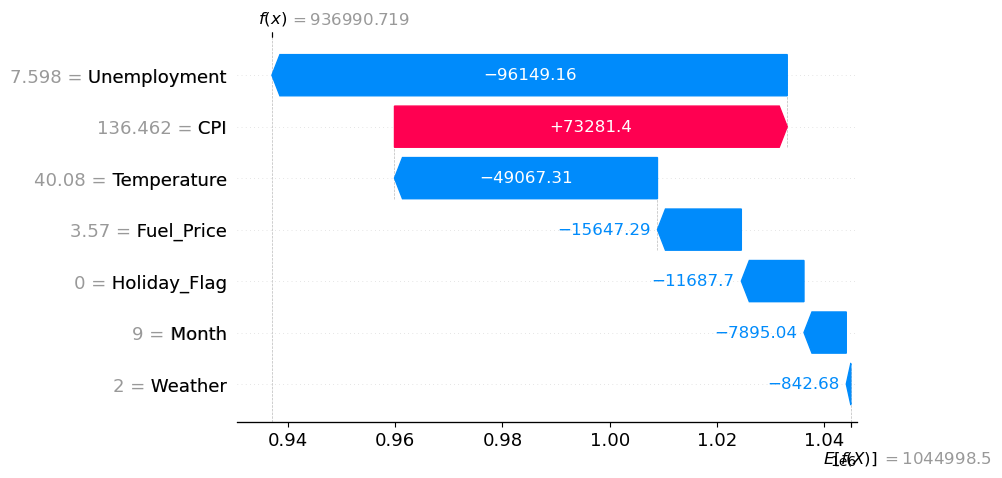

In [ ]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[3])

#### Mean SHAP Plot:
It Represents the mean absolute SHAP values for each feature across all predictions. It displays as a bar plot, indicating the average impact of each feature.

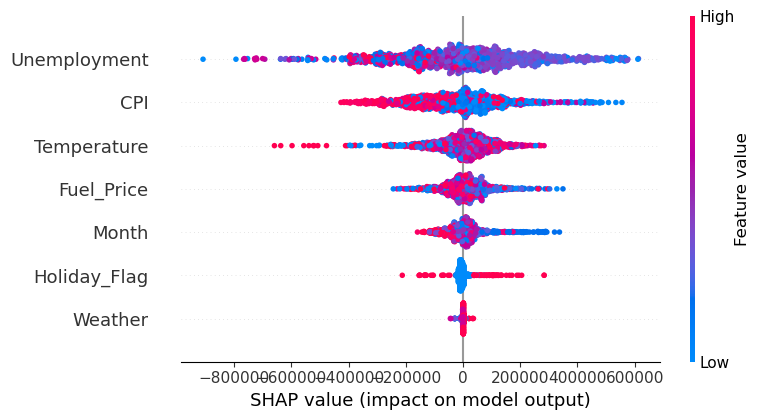

In [ ]:
shap.summary_plot(shap_values, X_test)

#### Beeswarm Plot:
Beeswarm plot provides a detailed view of feature contributions for every prediction in the dataset. Each point represents a prediction, and the plot shows the distribution of feature contributions.

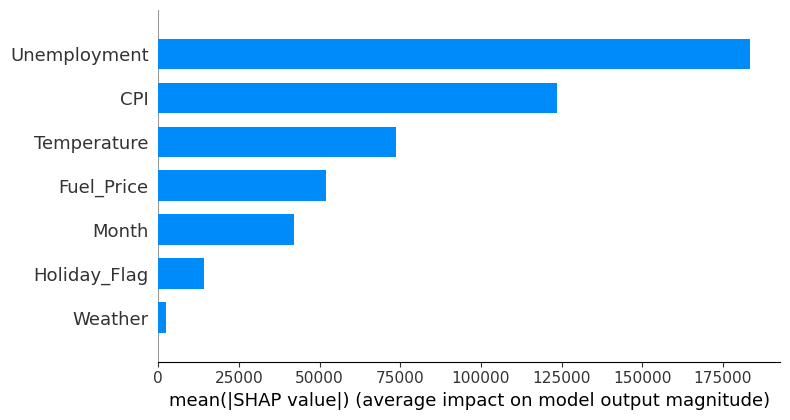

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

Can be used to interpret complex/ black box models

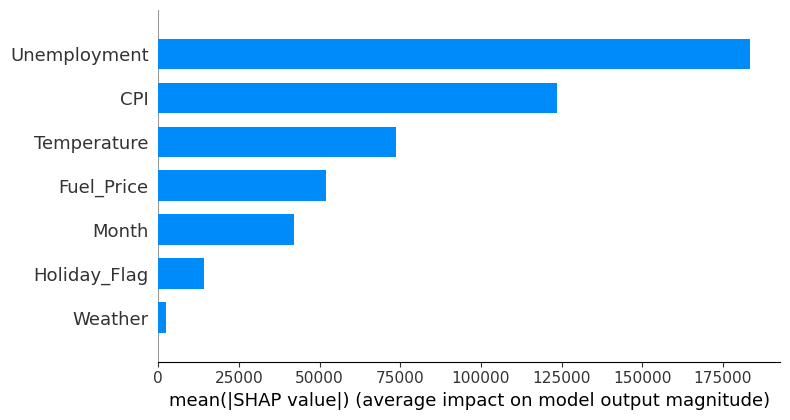

In [ ]:
from sklearn.tree import DecisionTreeRegressor

black_box_model = DecisionTreeRegressor(random_state=42)
black_box_model.fit(X_train, y_train)

# SHAP values for the black box model
explainer1 = shap.Explainer(black_box_model)
shap_values1 = explainer1.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar')

### Applications of SHAP:
- Explain ability in Machine Learning Models: SHAP makes it easier to understand how complex machine models make decisions.
- Feature Importance Analysis: It shows us which parts are more important for better understanding.
- Interpreting Black Box Models: SHAP works with both straightforward(LR,LogR) and complex models(DT,RF), making it simple to understand how they work.

# H. Choosing the Algorithm for the Project

- As it's Time series problem we can use SARIMAX, Prophet models.
- SARIMAX can handle external predictors unlike SARIMA but it doesn't habdle the complex non-linear relationships between predictors.
- Prophet is more advanced easy to interpret model specifically for time series forecasting that can also handle seasonality,trends, external predictors and non-linear relationships.
- We can also use XGBoost after some feature engineering as data has some external factors affecting sales.
    - Though XGBoost specifically can't handle time series data it handles complex, non-linear relationships and feature interaction much more effectively than prophet.

# I. Model Building

In [ ]:
df1=df.copy()
df1

Store       Date      Month  Quarter  Weekly_Sales  Holiday_Flag  \
0         1 2010-02-05   February        1    1643690.90             0   
1         1 2010-02-12   February        1    1641957.44             1   
2         1 2010-02-19   February        1    1611968.17             0   
3         1 2010-02-26   February        1    1409727.59             0   
4         1 2010-03-05      March        1    1554806.68             0   
...     ...        ...        ...      ...           ...           ...   
6430     45 2012-09-28  September        3     713173.95             0   
6431     45 2012-10-05    October        4     733455.07             0   
6432     45 2012-10-12    October        4     734464.36             0   
6433     45 2012-10-19    October        4     718125.53             0   
6434     45 2012-10-26    October        4     760281.43             0   

      Temperature Weather  Fuel_Price         CPI  Unemployment  
0           42.31    Mild       2.572  211.096358         8.106  
1           38.51    Mild       2.548  211.242170         8.106  
2           39.93    Mild       2.514  211.289143         8.106  
3           46.63    Mild       2.561  211.319643         8.106  
4           46.50    Mild       2.625  211.350143         8.106  
...           ...     ...         ...         ...           ...  
6430        64.88    Warm       3.997  192.013558         8.684  
6431        64.89    Warm       3.985  192.170412         8.667  
6432        54.47    Mild       4.000  192.327265         8.667  
6433        56.47    Mild       3.969  192.330854         8.667  
6434        58.85    Mild       3.882  192.308899         8.667  

[6435 rows x 11 columns]

In [ ]:
df1.drop(['Month','Quarter','Weather'],axis=1,inplace=True)

In [ ]:
df1

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [ ]:
from prophet import Prophet
from sklearn.metrics import *

### Forecast the sales for each store for the next 12 weeks.

15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing


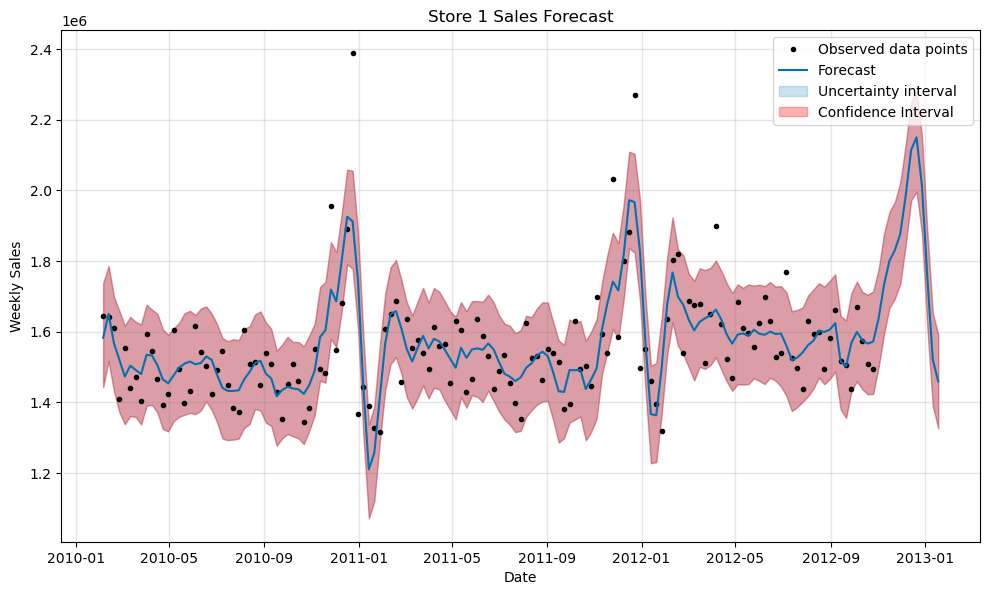

15:58:50 - cmdstanpy - INFO - Chain [1] start processing
15:58:50 - cmdstanpy - INFO - Chain [1] done processing


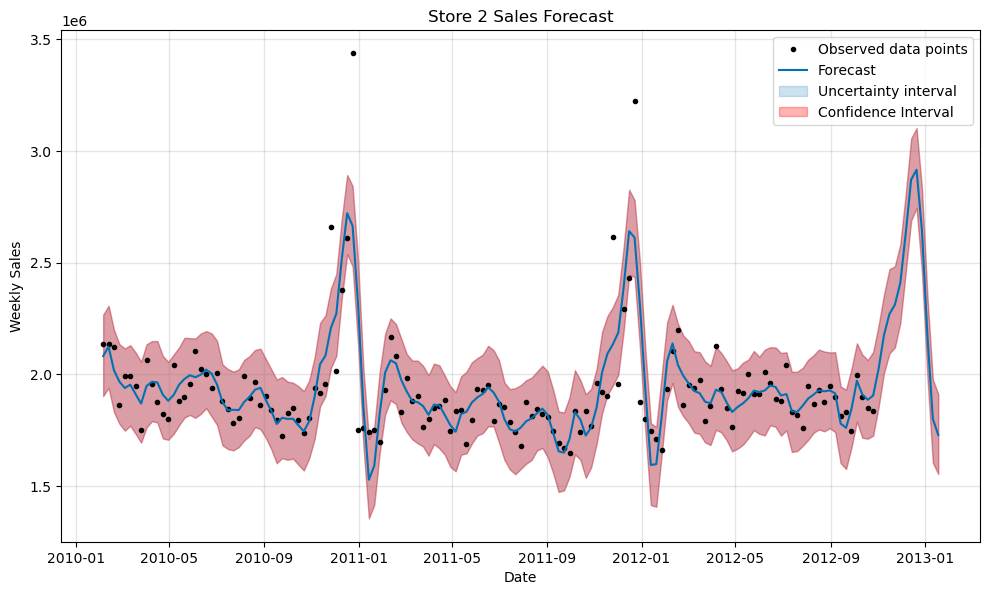

15:58:51 - cmdstanpy - INFO - Chain [1] start processing
15:58:51 - cmdstanpy - INFO - Chain [1] done processing


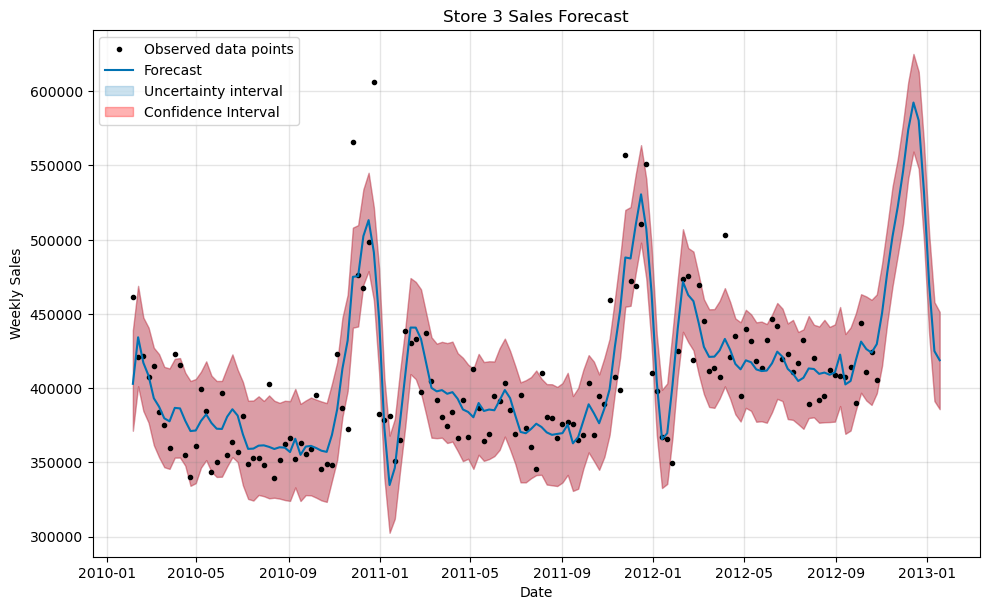

15:58:53 - cmdstanpy - INFO - Chain [1] start processing
15:58:53 - cmdstanpy - INFO - Chain [1] done processing


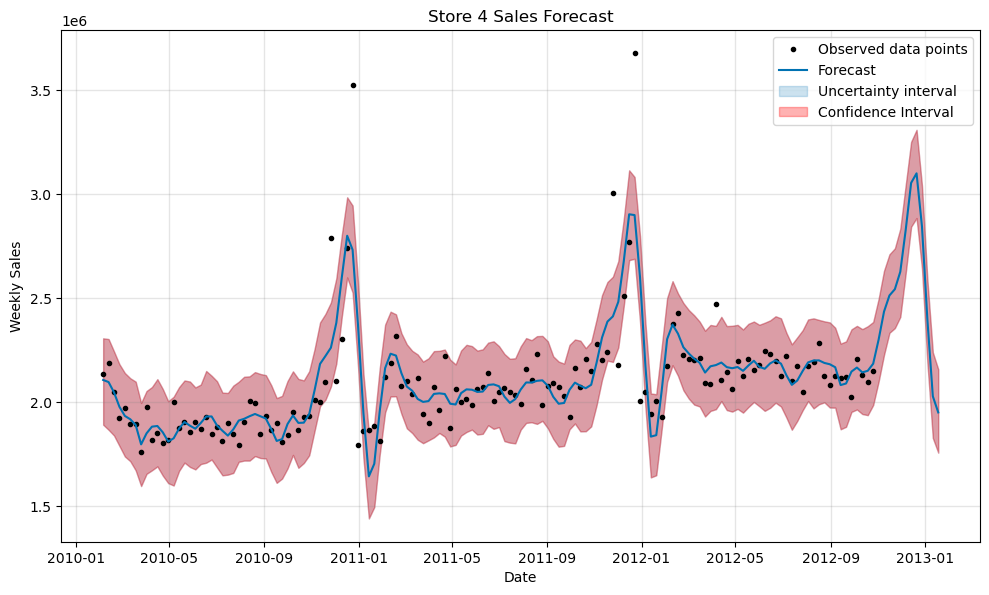

15:58:55 - cmdstanpy - INFO - Chain [1] start processing
15:58:55 - cmdstanpy - INFO - Chain [1] done processing


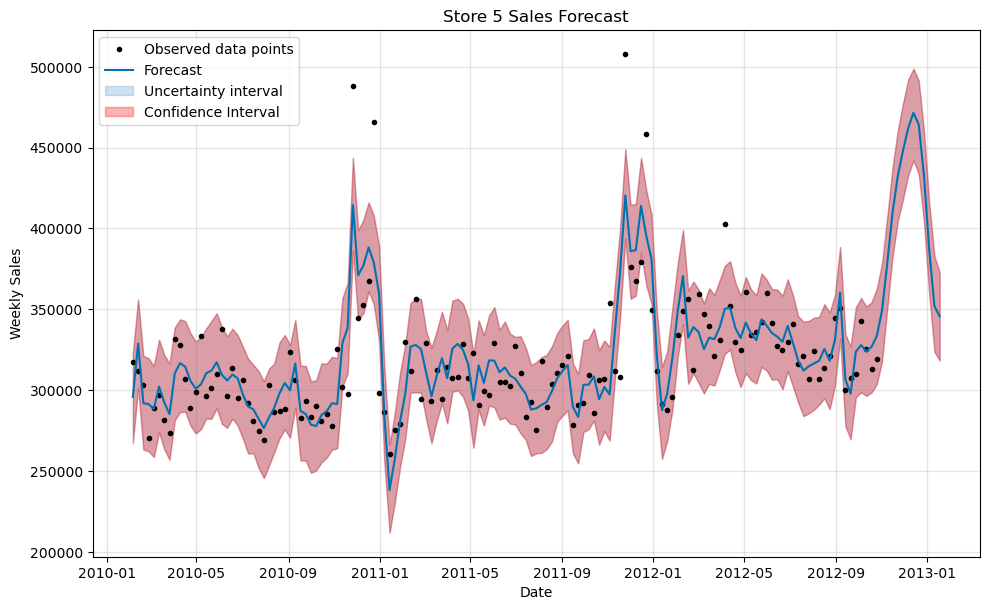

15:58:56 - cmdstanpy - INFO - Chain [1] start processing
15:58:56 - cmdstanpy - INFO - Chain [1] done processing


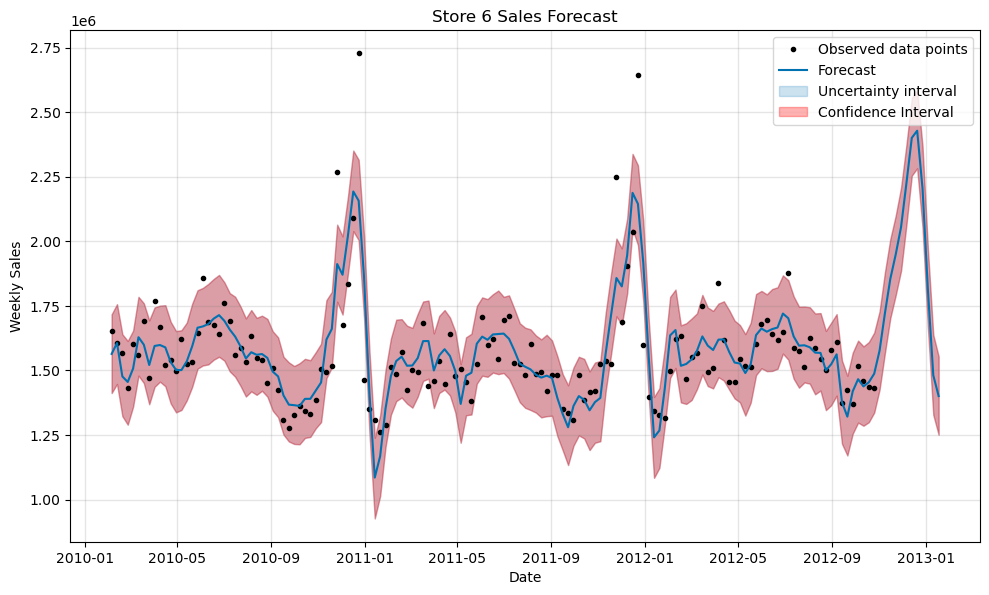

15:58:58 - cmdstanpy - INFO - Chain [1] start processing
15:58:58 - cmdstanpy - INFO - Chain [1] done processing


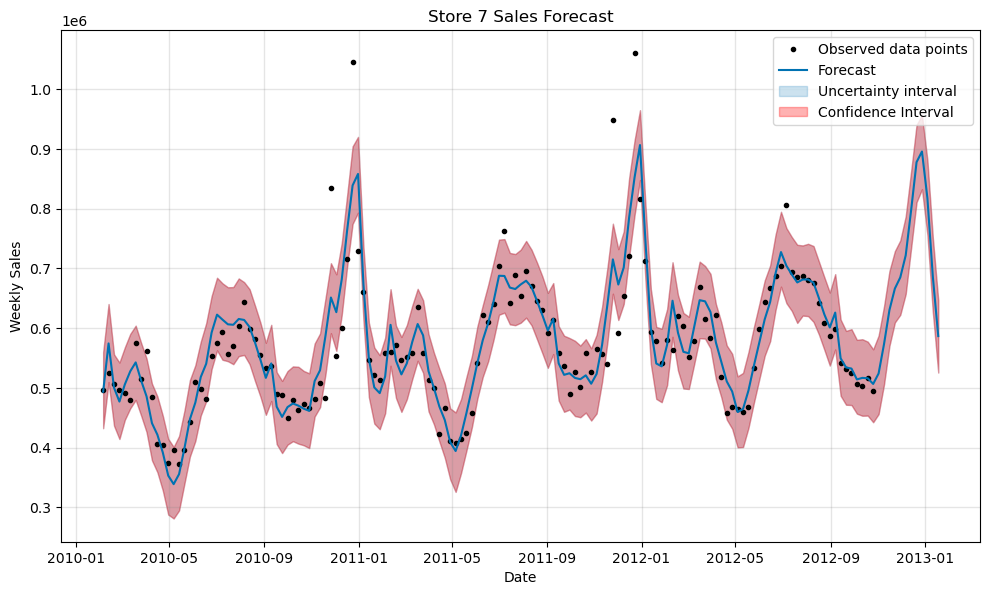

15:58:59 - cmdstanpy - INFO - Chain [1] start processing
15:59:00 - cmdstanpy - INFO - Chain [1] done processing


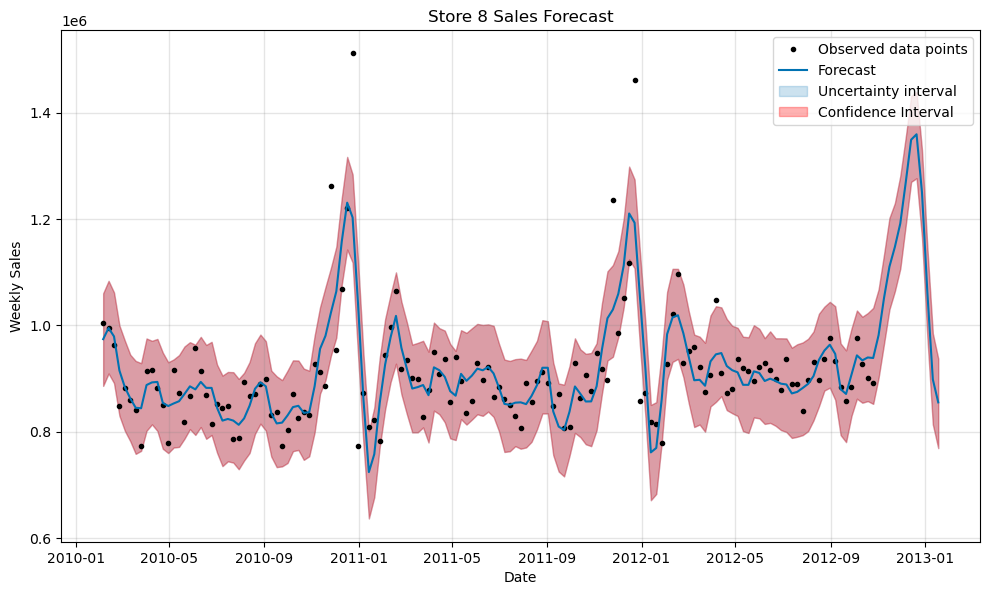

15:59:01 - cmdstanpy - INFO - Chain [1] start processing
15:59:01 - cmdstanpy - INFO - Chain [1] done processing


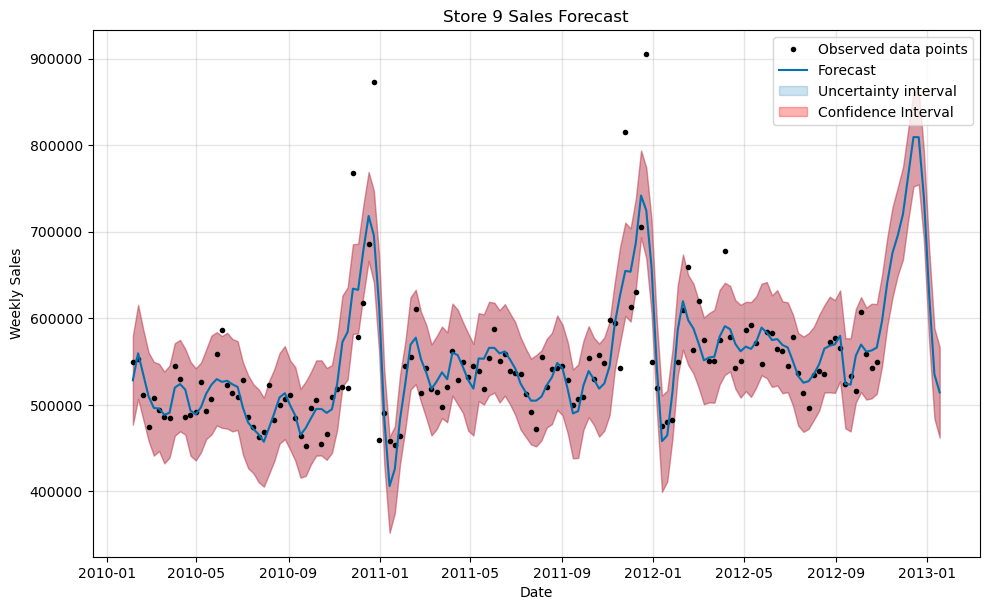

15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing


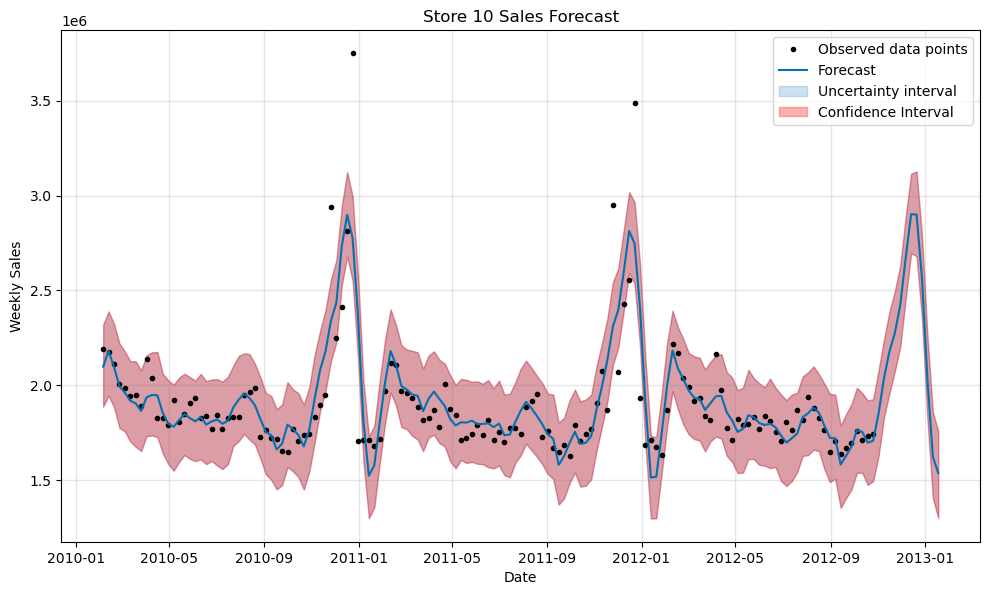

In [ ]:
store_forcasts = pd.DataFrame()
metrics= []

for store_no in range(1,11):
    store=df1[df1['Store']==store_no].copy()
    store.rename(columns={'Date' : 'ds', 'Weekly_Sales' : 'y'},inplace=True)

    model=Prophet()
    model.add_regressor('Holiday_Flag')
    model.add_regressor('Temperature')
    model.add_regressor('Fuel_Price')
    model.add_regressor('CPI')
    model.add_regressor('Unemployment')
    model.fit(store)

    future=model.make_future_dataframe(periods=12,freq='W-FRI')
    future = pd.merge(future, store[['ds', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']],
                       on='ds', how='left')
    future.fillna(method='ffill', inplace=True)

    forecast=model.predict(future)
    forecast['Store'] = store_no

    store_forcasts= pd.concat([store_forcasts,forecast], ignore_index=True)

    model.plot(forecast)

    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='r', alpha=0.3
                    ,label='Confidence Interval')
    plt.title(f"Store {store_no} Sales Forecast")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.show()

    # Metrics - Excluding forecast
    actual= store['y'].tail(len(forecast)-12).values
    predicted = forecast['yhat'].iloc[0:-12].values

    mae= mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse=np.sqrt(mse)
    mape = np.mean(np.abs((actual-predicted)/actual)) * 100

    metrics.append({'MAE': mae, 'MSE' : mse, 'RMSE' : rmse, 'MAPE' : mape})

metrics_df=pd.DataFrame(metrics)


# J. Model Evaluation and Techniques

In [ ]:
print("Evaluation Metrics for Each Store:")
print(metrics_df)

Evaluation Metrics for Each Store:
            MAE           MSE           RMSE      MAPE
0  75248.073779  1.108683e+10  105294.015155  4.758047
1  85414.862957  2.025765e+10  142329.356086  4.191545
2  19289.847239  7.048856e+08   26549.681968  4.656628
3  93139.206707  2.591220e+10  160972.676979  4.188780
4  16006.538631  5.017608e+08   22400.018580  4.816765
5  79866.392254  1.432410e+10  119683.352096  4.867901
6  30859.344315  2.449510e+09   49492.525069  5.069571
7  41738.905631  4.306811e+09   65626.300052  4.422945
8  25453.204280  1.689279e+09   41100.833349  4.421571
9  94295.982271  2.903464e+10  170395.536862  4.552496


# K. Future Possibilities of the Project

- **Waste Reduction** : Can use forecasts to minimize overstock and reduce waste, especially for perishable items.
- **Supply Chain Planning** : Support sustainability goals by optimizing supply chain planning.
- **Marketing Campaigns** : Identify optimal timing for promotions based on forecasted trends like before holiday season.
- **Capex Expansion** : Planning where to focus and deploy the expenditure for further growth.
- **Revenue Analysis** : Analysing the revenue generated by each store.
- **Inventory Management** : Deciding when to expand and contract the inventory based on seasonality.